## Mini Project 2

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Load given datasets

In [3]:
df_train = pd.read_csv('Consumer_Complaints_train.csv')
df_test = pd.read_csv('Consumer_Complaints_test.csv')

Print top 5 records of train dataset

In [6]:
df_train.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


Print top 5 records of test dataset

In [8]:
df_test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


**Note: Please note that do all given tasks for test and train both datasets.**

Print shape of train and test datasets 

In [15]:
print(df_train.shape)
print(df_test.shape)

(358810, 18)
(119606, 17)


Print columns of train and test datasets

In [17]:
print(df_train.columns)
print(df_test.columns)

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')
Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')


Check data type for both datasets

In [18]:
data_types_train = pd.DataFrame(df_train.dtypes, columns = ['Train'])
data_types_test = pd.DataFrame(df_test.dtypes, columns = ['Test'])
data_types = pd.concat([data_types_train, data_types_test], axis = 1)
data_types

,Train,Test
Date received,object,object
Product,object,object
Sub-product,object,object
Issue,object,object
Sub-issue,object,object
Consumer complaint narrative,object,object
Company public response,object,object
Company,object,object
State,object,object
ZIP code,object,object


Print missing values in percentage

In [19]:
missing_values_train = pd.DataFrame(df_train.isna().sum()/len(df_train)*100, columns = ['Train'])
missing_values_test = pd.DataFrame(df_test.isna().sum()/len(df_test)*100, columns = ['Test'])
missing_values = pd.concat([missing_values_train, missing_values_test], axis = 1)
missing_values

,Train,Test
Date received,0.000000,0.000000
Product,0.000000,0.000000
Sub-product,28.925058,28.997709
Issue,0.000000,0.000000
Sub-issue,61.139322,61.242747
Consumer complaint narrative,84.342688,84.186412
Company public response,81.067696,81.221678
Company,0.000000,0.000000
State,0.809063,0.782569
ZIP code,0.811293,0.783406


Drop columns where more than 25% of the data are missing.

In [20]:
missing_values = ['Sub-product', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?']
df_train = df_train.drop(missing_values, axis = 1)
df_test = df_test.drop(missing_values, axis = 1)

Extract Date, Month, and Year from the "Date Received" Column and create new fields for year, month, and day.

like, df_train['Year_Received'] = df_train['Date received']........(logic)

In [22]:
from datetime import datetime

In [23]:
df_train['Year_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').year)
df_test['Year_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').year)
df_train['Month_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)
df_test['Month_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)
df_train['Day_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').day)
df_test['Day_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').day)

Convert dates from object type to datetime type

In [30]:
print(df_train["Date received"].dtypes)

object


In [33]:
df_train.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year_Received,Month_Received,Day_Received
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,2013,12,20
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,2016,3,3
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,2015,1,30


In [40]:
df_train['Date received'] = pd.to_datetime(df_train['Date received'])
df_test['Date received'] = pd.to_datetime(df_test['Date received'])
df_train['Date sent to company'] = pd.to_datetime(df_train['Date sent to company'])
df_test['Date sent to company'] = pd.to_datetime(df_test['Date sent to company'])

Calculate the number of days the complaint was with the company

create new field with help given logic<br>
Like, Days held = Date sent to company - Date received

In [41]:
df_train['Days held'] = df_train['Date sent to company'] - df_train['Date received']
df_test['Days held'] = df_test['Date sent to company'] - df_test['Date received']

Convert "Days Held" to Int(above column)

In [42]:
df_train['Days held'] = df_train['Days held'].astype('timedelta64[D]')
df_test['Days held'] = df_test['Days held'].astype('timedelta64[D]')

Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"

In [44]:
df_train = df_train.drop(['Date received', 'Date sent to company','ZIP code', 'Complaint ID'], axis = 1)
df_test = df_test.drop(['Date received', 'Date sent to company','ZIP code', 'Complaint ID'], axis = 1)

Impute null values in "State" by Mode 
(find mode and replace nan value)

In [45]:
df_train['State'].mode(), df_test['State'].mode()

(0    CA
 Name: State, dtype: object,
 0    CA
 Name: State, dtype: object)

In [ ]:
df_train['State'] = df_train['State'].replace(np.nan, 'CA')
df_test['State'] = df_test['State'].replace(np.nan, 'CA')

Check Missing Values in the dataset

In [46]:
missing_values_train = pd.DataFrame(df_train.isna().sum(), columns = ['Train'])
missing_values_test = pd.DataFrame(df_test.isna().sum(), columns = ['Test'])
missing_values = pd.concat([missing_values_train, missing_values_test], axis = 1)
missing_values


,Train,Test
Product,0,0.0
Issue,0,0.0
Company,0,0.0
State,2903,936.0
Submitted via,0,0.0
Company response to consumer,0,0.0
Timely response?,0,0.0
Consumer disputed?,0,NaN
Year_Received,0,0.0
Month_Received,0,0.0


Categorize Days into Weeks with the help of 'Days Received' and Drop "Day_Received" column

In [47]:
week_train = []
for i in df_train['Day_Received']:
    if i < 8:
        week_train.append(1)
    elif i >= 8 and i < 16:
        week_train.append(2)
    elif i >=16 and i < 22:
        week_train.append(3)
    else:
        week_train.append(4)
df_train['Week_Received'] = week_train
week_test = []
for i in df_test['Day_Received']:
    if i < 8:
        week_test.append(1)
    elif i >= 8 and i < 16:
        week_test.append(2)
    elif i >=16 and i < 22:
        week_test.append(3)
    else:
        week_test.append(4)
df_test['Week_Received'] = week_test
df_train = df_train.drop(['Day_Received'], axis = 1)
df_test = df_test.drop(['Day_Received'], axis = 1)

Print head of train and test dataset and observe

In [49]:
df_train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year_Received,Month_Received,Days held,Week_Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,0.0,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,0.0,4
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,14.0,3
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,1.0,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,0.0,4


In [50]:
df_test.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year_Received,Month_Received,Days held,Week_Received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,0.0,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,0.0,4
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,0.0,1
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,3.0,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,0.0,1


Store data of the disputed consumer in the new data frame as "disputed_cons"

In [51]:
disputed_cons = df_train[df_train['Consumer disputed?'] == 'Yes']

Plot bar graph for the total no of disputes with the help of seaborn

Text(0, 0.5, 'Count')

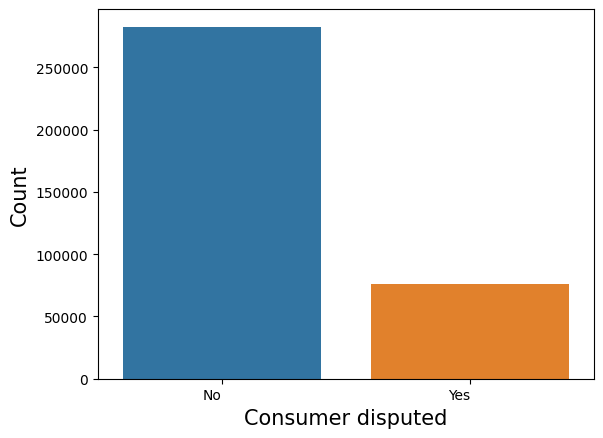

In [52]:
sns.countplot(x = 'Consumer disputed?', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Consumer disputed', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Plot bar graph for the total no of disputes products-wise with help of seaborn

Text(0, 0.5, 'Count')

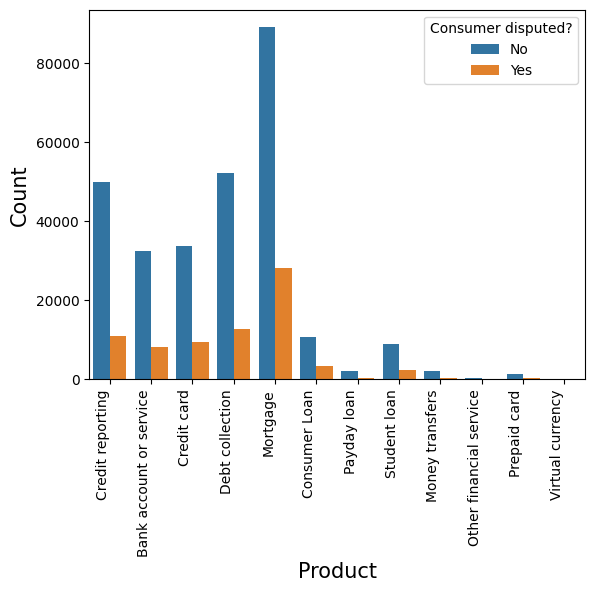

In [53]:
sns.countplot(x = 'Product', hue = 'Consumer disputed?', data = df_train)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Product', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Plot bar graph for the total no of disputes with Top Issues by Highest Disputes , with help of seaborn

Text(0, 0.5, 'Count')

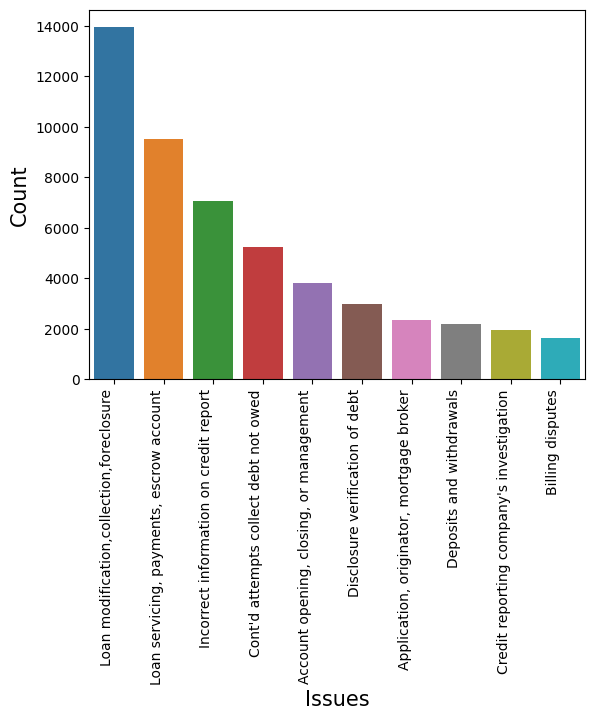

In [54]:
top_issues_disputes = disputed_cons['Issue'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = top_issues_disputes.index, y = top_issues_disputes.values)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Issues', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Plot bar graph for the total no of disputes by State with Maximum Disputes

Text(0, 0.5, 'Count')

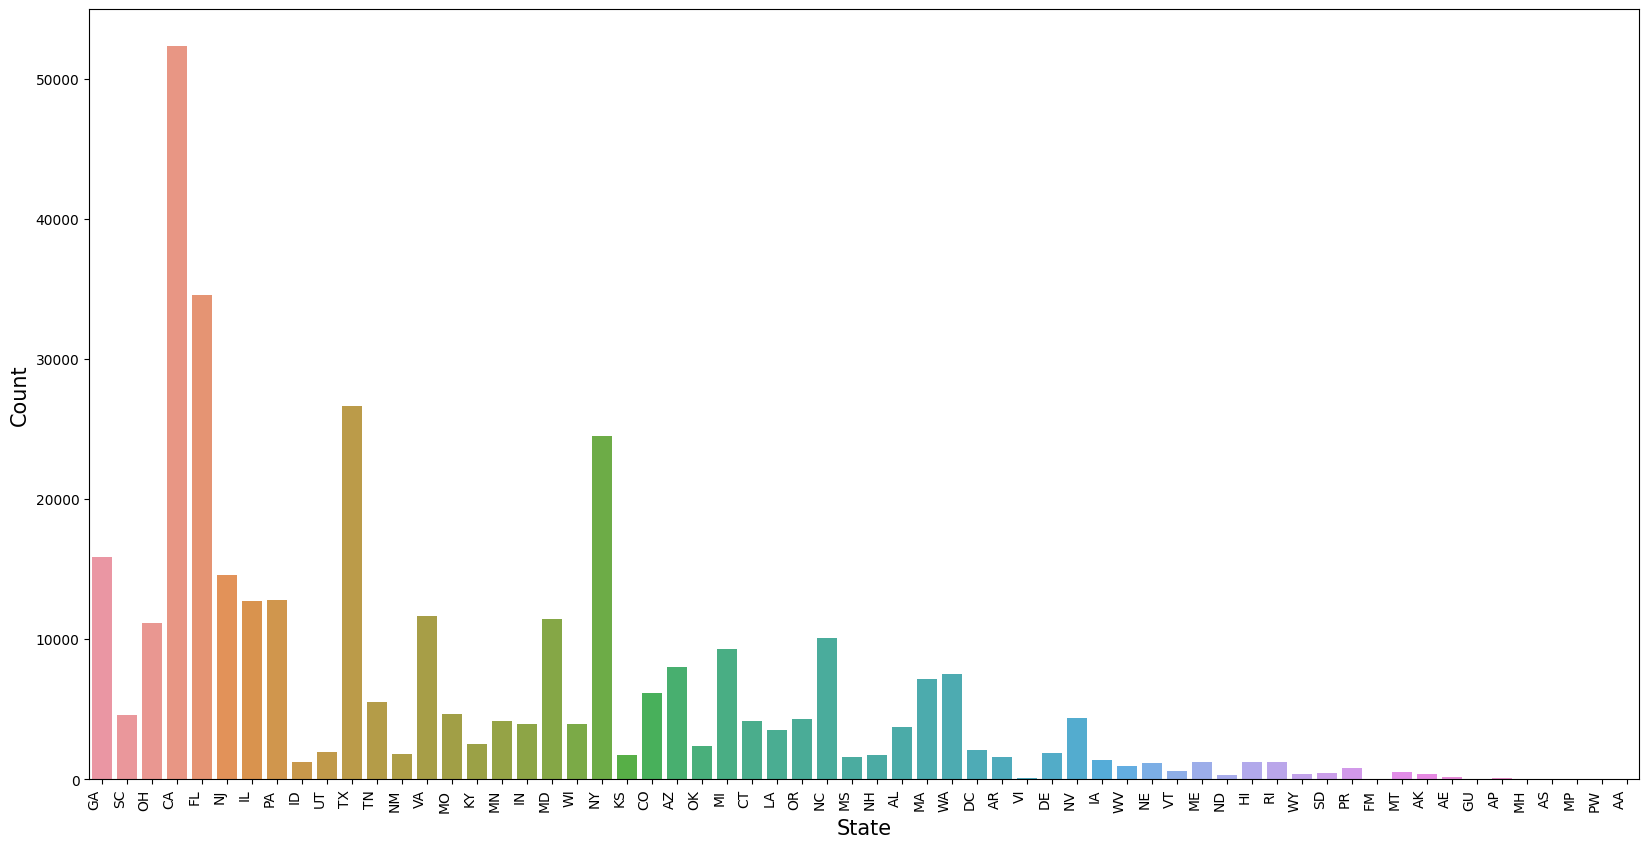

In [55]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x = df_train['State'])
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Plot bar graph for the total no of disputes by Submitted Via diffrent source 

Text(0, 0.5, 'Count')

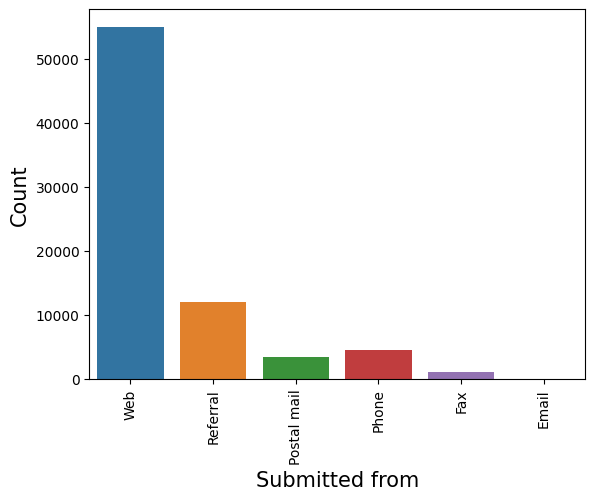

In [56]:
sns.countplot(x = 'Submitted via', data = disputed_cons)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Submitted from', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Plot bar graph for the total no of disputes wherevCompany's Response to the Complaints

Text(0, 0.5, 'Count')

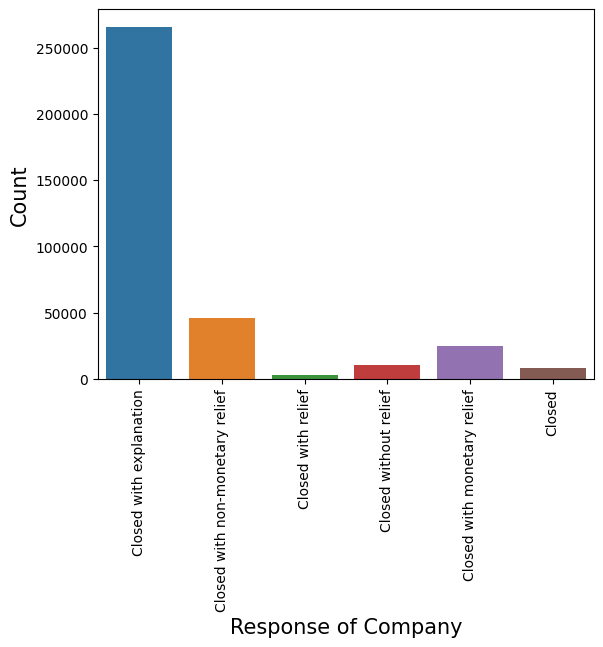

In [57]:
sns.countplot(x = 'Company response to consumer', data = df_train)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Response of Company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Plot bar graph for the total no of disputes where Company's Response Leading to Disputes

Text(0, 0.5, 'Count')

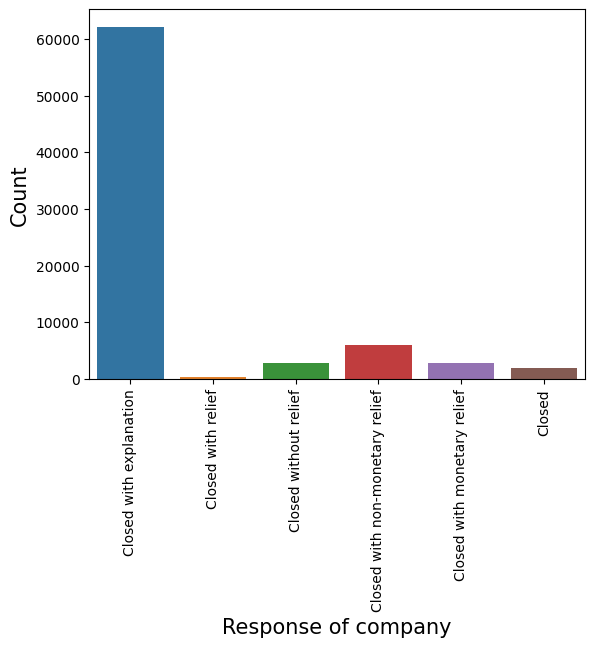

In [58]:
sns.countplot(x = 'Company response to consumer', data = disputed_cons)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Response of company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Plot bar graph for the total no of disputes Whether there are Disputes Instead of Timely Response

Text(0, 0.5, 'Count')

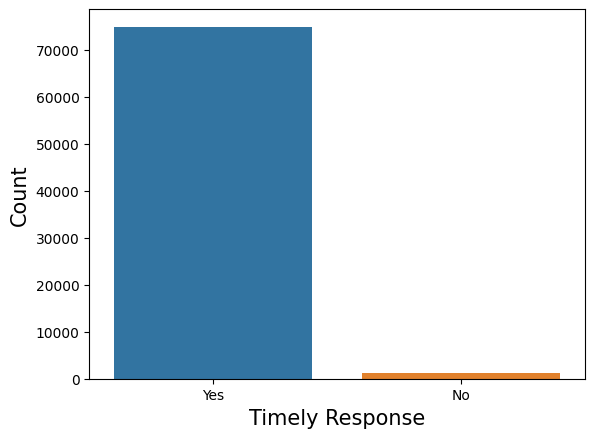

In [59]:
sns.countplot(x = 'Timely response?', data = disputed_cons)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Timely Response', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Plot bar graph for the total no of disputes over Year Wise Complaints

Text(0, 0.5, 'Count')

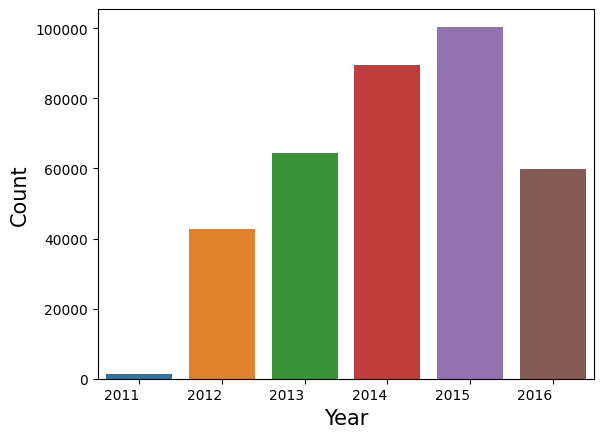

In [60]:
sns.countplot(x = 'Year_Received', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Plot bar graph for the total no of disputes over Year Wise Disputes

Text(0, 0.5, 'Count')

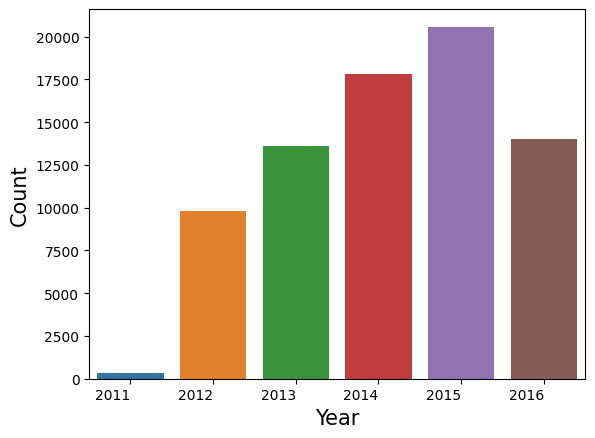

In [61]:
sns.countplot(x = 'Year_Received', data = disputed_cons)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Plot  bar graph for the top companies with highest complaints

Text(0, 0.5, 'Count')

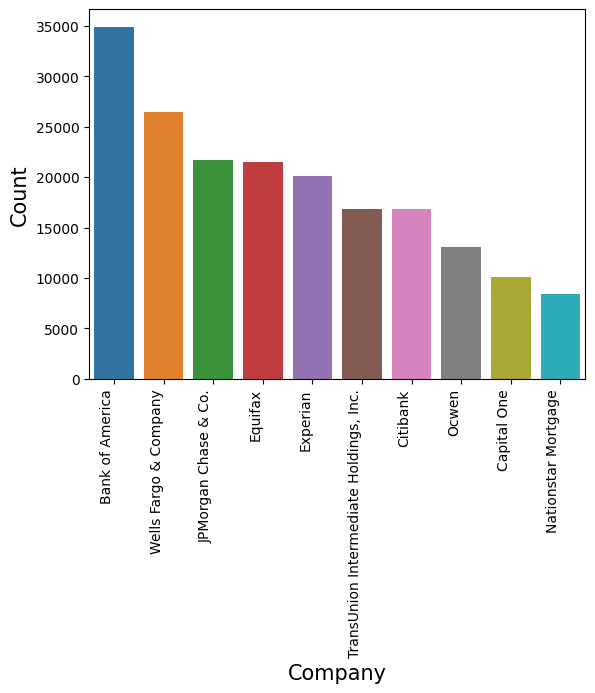

In [64]:
top_company_complaints = df_train['Company'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = top_company_complaints.index, y = top_company_complaints.values)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

"Days Held" Column Analysis(describe)

In [63]:
df_train['Days held'].describe()

count    358810.000000
mean          4.456339
std          16.741676
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Days held, dtype: float64

Convert Negative Days Held to Zero(it is the time taken by authority can't be negative)

In [65]:
Days_held_train = []
for i in df_train['Days held']:
    if i < 0:
        Days_held_train.append(0)
    else:
        Days_held_train.append(i)
df_train['Days_held'] = Days_held_train
Days_held_test = []
for i in df_test['Days held']:
    if i < 0:
        Days_held_test.append(0)
    else:
        Days_held_test.append(i)
df_test['Days_held'] = Days_held_test


Drop Days Held with Negative Values

In [66]:
df_train = df_train.drop('Days held', axis = 1)
df_test = df_test.drop('Days held', axis = 1)

Text pre-processing
(It will be cover in upcoming calsses)

In [72]:
relevant_text_train = df_train['Issue']
relevant_text_test = df_test['Issue']
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(x.lower()))
def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))
stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

In [73]:
df_train['Issues_cleaned'] = clean_data_train
df_test['Issues_cleaned'] = clean_data_test
df_train = df_train.drop('Issue', axis = 1)
df_test = df_test.drop('Issue', axis = 1)

Drop Unnecessary Columns for the Model Building<br>
like:'Company', 'State', 'Year_Received', 'Days_held'

In [74]:
drop_cols = ['Company', 'State', 'Year_Received', 'Days_held']
df_train = df_train.drop(drop_cols, axis = 1)
df_test = df_test.drop(drop_cols, axis = 1)

Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

In [75]:
df_train['Consumer disputed?'] = np.where(df_train['Consumer disputed?'] == "Yes", 1, 0)

Create Dummy Variables for catagorical features 
like: 'Product', 'Submitted via', 'Company response to consumer', 'Timely response?'

In [79]:
dum_cols = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']
df_train_dummies = pd.get_dummies(df_train[dum_cols], prefix_sep = '_', drop_first = True)
df_test_dummies = pd.get_dummies(df_test[dum_cols], prefix_sep = '_', drop_first = True)
df_train = df_train.drop(dum_cols, axis = 1)
df_test = df_test.drop(dum_cols, axis = 1)


KeyError: "None of [Index(['Product', 'Submitted via', 'Company response to consumer',\n       'Timely response?'],\n      dtype='object')] are in the [columns]"

Concate Dummy Variables and Drop the Original Columns

In [78]:
df_train = pd.concat([df_train, df_train_dummies], axis = 1)
df_test = pd.concat([df_test, df_test_dummies], axis = 1)

Calculating TF-IDF

In [81]:
pip install -U scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [83]:
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(df_train['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(df_test['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

Replacing Issues_cleaned by Vectorized Issues

In [84]:
df_train = df_train.drop('Issues_cleaned', axis = 1)
df_test = df_test.drop('Issues_cleaned', axis = 1)
df_train = pd.concat([df_train, issues_train], axis = 1)
df_test = pd.concat([df_test, issues_test], axis = 1)
Feature168 = [0] * 119606
df_test['Feature168'] = Feature168

observe train and test datasets

In [110]:
df_train.head()

,Consumer disputed?,Month_Received,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,Product_Student loan,Product_Virtual currency,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,Product_Student loan,Product_Virtual currency,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,Feature41,Feature42,Feature43,Feature44,Feature45,Feature46,Feature47,Feature48,Feature49,Feature50,Feature51,Feature52,Feature53,Feature54,Feature55,Feature56,Feature57,Feature58,Feature59,Feature60,Feature61,Feature62,Feature63,Feature64,Feature65,Feature66,Feature67,Feature68,Feature69,Feature70,Feature71,Feature72,Feature73,Feature74,Feature75,Feature76,Feature77,Feature78,Feature79,Feature80,Feature81,Feature82,Feature83,Feature84,Feature85,Feature86,Feature87,Feature88,Feature89,Feature90,Feature91,Feature92,Feature93,Feature94,Feature95,Feature96,Feature97,Feature98,Feature99,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108,Feature109,Feature110,Feature111,Feature112,Feature113,Feature114,Feature115,Feature116,Feature117,Feature118,Feature119,Feature120,Feature121,Feature122,Feature123,Feature124,Feature125,Feature126,Feature127,Feature128,Feature129,Feature130,Feature131,Feature132,Feature133,Feature134,Feature135,Feature136,Feature137,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature147,Feature148,Feature149,Feature150,Feature151,Feature152,Feature153,Feature154,Feature155,Feature156,Feature157,Feature158,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0,10,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399029,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.469431,0.0,0.0,0.469773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.469773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,

Observe Shape of new Train and Test Datasets

In [111]:
print(df_train.shape)
print(df_test.shape)

(358810, 215)
(119606, 214)


Scaling the Data Sets (note:discard dependent variable before doing standardization)

In [112]:
df_train.columns

Index(['Consumer disputed?', 'Month_Received', 'Week_Received',
       'Product_Consumer Loan', 'Product_Credit card',
       'Product_Credit reporting', 'Product_Debt collection',
       'Product_Money transfers', 'Product_Mortgage',
       'Product_Other financial service',
       ...
       'Feature159', 'Feature160', 'Feature161', 'Feature162', 'Feature163',
       'Feature164', 'Feature165', 'Feature166', 'Feature167', 'Feature168'],
      dtype='object', length=215)

In [113]:
df_test.head()

,Month_Received,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,Product_Student loan,Product_Virtual currency,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,Product_Student loan,Product_Virtual currency,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,Feature41,Feature42,Feature43,Feature44,Feature45,Feature46,Feature47,Feature48,Feature49,Feature50,Feature51,Feature52,Feature53,Feature54,Feature55,Feature56,Feature57,Feature58,Feature59,Feature60,Feature61,Feature62,Feature63,Feature64,Feature65,Feature66,Feature67,Feature68,Feature69,Feature70,Feature71,Feature72,Feature73,Feature74,Feature75,Feature76,Feature77,Feature78,Feature79,Feature80,Feature81,Feature82,Feature83,Feature84,Feature85,Feature86,Feature87,Feature88,Feature89,Feature90,Feature91,Feature92,Feature93,Feature94,Feature95,Feature96,Feature97,Feature98,Feature99,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108,Feature109,Feature110,Feature111,Feature112,Feature113,Feature114,Feature115,Feature116,Feature117,Feature118,Feature119,Feature120,Feature121,Feature122,Feature123,Feature124,Feature125,Feature126,Feature127,Feature128,Feature129,Feature130,Feature131,Feature132,Feature133,Feature134,Feature135,Feature136,Feature137,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature147,Feature148,Feature149,Feature150,Feature151,Feature152,Feature153,Feature154,Feature155,Feature156,Feature157,Feature158,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.874274,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.437137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211085,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,6,4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0

In [119]:
X = df_train.iloc[:,47:-1]

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale=scaler.fit(X)
X_scaled=scaler.transform(X)
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PC = pca.fit_transform(X_scaled_df)
p_Df = pd.DataFrame(data = PC
             , columns = ['principal component 1', 'principal component 2'])
p_Df.head()

,principal component 1,principal component 2
0,0.055173,5.261046
1,-0.264901,0.096857
2,-0.134615,0.057611
3,-0.588351,-0.912573
4,-0.588351,-0.912573


Do feature selection with help of PCA

In [121]:
df_train_scaled = pd.DataFrame(StandardScaler().fit_transform(df_train.drop('Consumer disputed?', axis = 1)), columns = df_test.columns)
df_test_scaled = pd.DataFrame(StandardScaler().fit_transform(df_test), columns = df_test.columns)
pca_columns = []
for i in range(df_train_scaled.shape[1]):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA()
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled), columns = pca_columns)
explained_info_train = pd.DataFrame(pca_model.explained_variance_ratio_, columns=['Explained Info']).sort_values(by = 'Explained Info', ascending = False)
imp = []
for i in range(explained_info_train.shape[0]):
    imp.append(explained_info_train.head(i).sum())
explained_info_train_sum = pd.DataFrame()
explained_info_train_sum['Variable'] = pca_columns
explained_info_train_sum['Importance'] = imp
explained_info_train_sum.head(6)

,Variable,Importance
0,PC1,Explained Info 0.0 dtype: float64
1,PC2,Explained Info 0.03902 dtype: float64
2,PC3,Explained Info 0.073694 dtype: float64
3,PC4,Explained Info 0.105794 dtype: float64
4,PC5,Explained Info 0.132213 dtype: float64
5,PC6,Explained Info 0.15666 dtype: float64


Select top features which are covering 80% of the information 
(n=53),
<br>store this data into new dataframe,

In [122]:
pca_columns = []
for i in range(53):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA(n_components = 53)
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled), columns = pca_columns)
df_pca_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,5.595598,-2.223083,-1.970941,-0.932760,0.240650,0.503166,-0.029555,0.440387,-0.725326,0.050325,-0.119737,-0.572823,-0.058850,0.675783,-1.049563,-0.778759,0.457631,0.323026,0.587385,-0.539670,-0.082315,0.172396,-0.508082,0.231982,-0.041616,0.077862,-0.304305,0.062403,0.569050,-0.244526,-0.630548,0.585447,-0.350559,0.029862,-0.364229,0.088164,0.160821,0.783995,0.011826,0.025671,0.099842,-0.902303,0.142639,-0.713789,-0.013047,-0.264381,0.292492,-0.461204,-0.047306,0.372146,0.010842,-0.173287,-0.125497
1,-0.103277,0.171622,0.307826,1.087753,-0.458674,-0.177081,-0.260333,0.070837,0.470793,0.176768,-0.231283,-0.301978,1.169047,-1.488124,1.977572,-5.882920,0.523610,-0.100950,-1.256200,0.478825,0.719344,0.043224,-0.762651,0.055264,0.090124,-0.235132,0.149180,-2.675749,0.422980,-2.866023,2.516397,3.444808,-1.847051,-0.137201,-0.393523,0.333721,1.062297,0.668904,-0.002864,-0.298226,0.362916,-0.390159,-0.760309,-0.062965,0.372620,-0.055372,-0.384212,0.247887,-0.924543,-0.492539,0.032812,0.926911,0.358014
2,0.442648,-0.025695,0.668442,2.612186,-2.195112,-1.454255,-0.233936,-0.487105,1.235386,-0.927699,0.034917,0.295463,-0.116332,-0.994508,1.283042,0.719684,-0.647118,-1.035934,-0.094979,0.082506,-0.667837,-1.767436,0.753210,-0.525108,0.146101,0.735971,0.446866,-1.414282,-0.608469,0.317516,-0.427327,-1.775670,2.489403,-1.096421,0.903518,-0.697114,1.452841,-2.687714,0.759877,-0.277093,-0.150757,0.140133,0.909288,0.216754,0.208383,-0.075028,-0.585728,-1.013705,0.089511,1.083287,-0.527086,-1.090436,-0.704894
3,-0.442971,4.076834,-0.849002,-0.458224,-0.782670,-0.302870,-0.247650,-0.493892,-1.872497,1.423761,-0.169036,2.399082,1.634482,-0.660343,0.303238,-1.207904,-2.518387,-1.159473,1.842519,-2.101532,3.350245,-2.444309,3.921592,-2.666510,-0.933954,-0.878776,1.408499,2.966930,0.375297,0.060454,0.123282,-0.028718,-2.046097,1.009317,0.420763,-0.264415,-1.422259,0.545765,-0.330341,0.461033,-0.237182,-0.025954,0.132804,-0.253383,-0.404294,-0.237783,0.150213,-0.219798,0.634164,1.148860,0.108005,-0.440244,-0.168292
4,0.443931,4.875257,-0.871756,-0.473827,0.030883,0.430000,-0.159993,-0.402271,-0.873588,2.213519,0.335058,2.545828,0.723015,-0.141410,-0.497035,-1.181524,-0.577808,-0.590820,1.597711,-1.701109,2.672195,-1.701004,4.054123,-2.567622,-1.042326,-0.885555,1.291157,3.725695,0.170939,-0.806493,0.124906,0.707617,-1.758957,0.550764,-0.276724,-0.107901,0.346410,-0.244437,-0.477715,-0.202258,0.098622,-0.440694,0.506210,-0.558263,-0.019294,-0.123649,0.164466,-0.364167,-0.187570,0.628022,0.089631,0.314960,-0.154340


In [123]:
pca_model = PCA(n_components = 53)
pca_model.fit(df_test_scaled)
df_pca_test = pd.DataFrame(pca_model.transform(df_test_scaled), columns = pca_columns)
df_pca_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,0.121813,0.064861,1.630178,4.019814,2.715892,-1.048827,-0.367845,-0.277276,2.973585,-0.361648,0.846803,0.914617,-1.755899,-1.490385,-0.282571,0.838853,2.088983,0.051140,1.372772,2.870136,-0.777730,-0.952334,0.475154,-0.110059,-0.352692,0.813273,2.026953,-0.687740,0.433073,-2.969179,-1.845619,-2.603072,-0.000898,-1.426387,0.130423,-2.598796,-11.967679,-4.454312,-2.484332,0.398448,-1.808314,3.214017,1.089416,0.435519,-0.507841,-0.744004,0.978395,2.681524,-0.494577,5.796773,-6.928733,-1.404988,-1.573890
1,0.414568,0.428322,2.965028,-0.075102,-4.659315,-1.644373,4.658692,0.723254,-0.641249,-0.702038,0.360415,-0.798871,-0.607943,0.725570,0.423374,-1.738834,-2.229675,0.372438,-2.777456,0.341533,-0.301794,-2.302004,4.453494,-2.101107,0.144010,1.241417,5.739606,-1.277599,4.191194,2.326179,2.740461,-1.880487,1.808397,-0.750474,2.202483,0.040805,-1.072196,1.936323,-0.650072,1.280413,1.211533,0.086418,-0.014179,1.427478,0.876767,-0.436580,-0.540051,0.557645,0.814908,2.289656,2.304061,-0.203157,-1.165691
2,0.815241,0.036322,0.614360,3.368786,0.968526,-1.282070,-0.091853,-0.568845,3.171491,-0.742921,-0.815917,1.308748,-0.686866,-1.911741,-3.315893,-0.442275,3.097631,0.061982,5.409280,-1.313041,1.028956,-3.669945,2.211154,-0.715937,-2.268544,2.411498,11.792790,-3.834996,-19.981088,10.497162,5.927194,9.167206,-1.671809,-0.367018,-2.619487,1.011874,-0.797006,0.485945,-0.127219,-0.550776,0.438044,0.315754,0.120594,-0.411430,0.415792,-0.260786,0.314756,0.950030,-0.231458,-0.054503,0.220425,-0.174346,-0.140571
3,3.055926,-0.197008,12.860003,-7.008839,-6.980140,-5.931219,3.340038,-2.802243,5.047134,0.236522,1.929198,2.555071,-0.468917,-1.044314,2.426311,1.028107,-0.836267,-0.413816,-0.272759,0.227490,0.063429,-0.548632,-0.148111,0.333628,-0.240334,0.410878,-0.986150,-1.000765,1.230064,1.869942,-4.652108,3.099180,-1.009077,-1.768460,0.264405,-0.046236,-0.895023,0.986859,0.233223,-0.122346,-0.420869,-0.548085,-0.001448,-1.246762,-0.357096,0.066458,0.124863,0.437816,-0.393256,-0.062635,0.157600,1.196364,-0.112346
4,0.819637,4.751451,-0.165240,1.462214,-1.650929,2.180030,-1.237295,-0.815492,-3.807027,7.756866,-1.631776,9.574279,4.009085,0.805798,-0.231666,1.754391,0.550218,-2.828186,-1.592751,0.304125,-0.899998,-1.752078,-5.158623,-1.760217,2.033025,-0.312861,2.387232,-2.508962,0.605205,0.211261,-0.382231,-0.624344,-0.117715,0.454885,-0.064502,-0.213530,0.179677,-0.173500,0.296817,0.085582,-0.010054,0.280717,-0.157763,-0.222037,-0.083553,0.103690,0.010357,-0.140921,0.070946,0.290996,0.164073,0.073878,0.277798


Split the Data Sets Into X and Y by dependent and independent variables (data selected by PCA)


In [124]:
X = df_pca_train
y = df_train['Consumer disputed?']

Split data into Train and Test datasets
(for test data use test excel file data)

In [125]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 17)
X_test = df_pca_test

Shapes of the datasets

In [126]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((251167, 53), (107643, 53), (251167,), (107643,), (119606, 53))

**Model building**
Build given models and mesure their test and validation accuracy 
build given models:
1. LogisticRegression
2. DecisionTreeClassifier
3. RandomForestClassifier
4. AdaBoostClassifier
5. GradientBoostingClassifier
6. KNeighborsClassifier
7. XGBClassifier

In [130]:
from xgboost import XGBClassifier

In [131]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), XGBClassifier()]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'XGBClassifier']
accuracy_train = []
accuracy_val = []

Final Model and Prediction for test data file

In [133]:
for model in models:
    mod = model
    mod.fit(X_train, y_train)
    y_pred_train = mod.predict(X_train)
    y_pred_val = mod.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_val.append(accuracy_score(y_val, y_pred_val))

In [ ]:
data = {'Modelling Algorithm' : model_names, 'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val}
data = pd.DataFrame(data)
data['Difference'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data.sort_values(by = 'Validation Accuracy', ascending = False)

Export Predictions to CSV

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test, columns = ['Prediction'])
y_pred_test.head()

In [ ]:
y_pred_test.to_csv('Prediction.csv')